<a href="https://colab.research.google.com/github/Shitrasburg/map/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 3 走路學問多

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import shutil
import folium
import io
import glob
from scipy.signal import find_peaks, peak_prominences
from PIL import Image, ImageDraw
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# DataPath = '/content/drive/MyDrive/Map/Lab3/Data/'

prefix = '/content/drive/MyDrive/mapLab3/'

DATA_DIR = prefix + 'Data/'
RESULT_DIR = prefix + 'Result/'

##載入記錄檔

1. 左邊選單上傳"csv檔案"

In [35]:
round = pd.read_csv(DATA_DIR+"09_70cm.csv")
round

,Timestamp,Gyroscope_x,Gyroscope_y,Gyroscope_z,Accelerometer_x,Accelerometer_y,Accelerometer_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Latitude,Longitude,Altitude,Speed
0,1681303081194,NaN,NaN,NaN,-0.015504,0.963012,0.408935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1681303081235,0.143051,-0.076889,-0.060028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1681303081268,NaN,NaN,NaN,NaN,NaN,NaN,-32.531738,-31.480408,-3.697205,NaN,NaN,NaN,NaN
3,1681303082127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.787184,120.997813,108.700005,0.563913
4,1681303082239,NaN,NaN,NaN,0.210449,1.089599,0.420166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,1681303187489,-0.829544,-0.350662,0.471542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,1681303188056,NaN,NaN,NaN,NaN,NaN,NaN,-2.827454,-15.074158,-52.027893,NaN,NaN,NaN,NaN
485,1681303188059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.787168,120.997793,108.800003,1.311054
486,1681303188447,NaN,NaN,NaN,-0.076661,0.833863,0.335937,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
r = round.ffill()
# r = r[:500]  #可以先從小筆資料來觀看波型
r

,Timestamp,Gyroscope_x,Gyroscope_y,Gyroscope_z,Accelerometer_x,Accelerometer_y,Accelerometer_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Latitude,Longitude,Altitude,Speed
0,1681303081194,NaN,NaN,NaN,-0.015504,0.963012,0.408935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1681303081235,0.143051,-0.076889,-0.060028,-0.015504,0.963012,0.408935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1681303081268,0.143051,-0.076889,-0.060028,-0.015504,0.963012,0.408935,-32.531738,-31.480408,-3.697205,NaN,NaN,NaN,NaN
3,1681303082127,0.143051,-0.076889,-0.060028,-0.015504,0.963012,0.408935,-32.531738,-31.480408,-3.697205,24.787184,120.997813,108.700005,0.563913
4,1681303082239,0.143051,-0.076889,-0.060028,0.210449,1.089599,0.420166,-32.531738,-31.480408,-3.697205,24.787184,120.997813,108.700005,0.563913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,1681303187489,-0.829544,-0.350662,0.471542,0.118286,1.192260,0.313598,-4.963684,-21.128845,-48.788452,24.787159,120.997794,108.800003,1.297622
484,1681303188056,-0.829544,-0.350662,0.471542,0.118286,1.192260,0.313598,-2.827454,-15.074158,-52.027893,24.787159,120.997794,108.800003,1.297622
485,1681303188059,-0.829544,-0.350662,0.471542,0.118286,1.192260,0.313598,-2.827454,-15.074158,-52.027893,24.787168,120.997793,108.800003,1.311054
486,1681303188447,-0.829544,-0.350662,0.471542,-0.076661,0.833863,0.335937,-2.827454,-15.074158,-52.027893,24.787168,120.997793,108.800003,1.311054


<Axes: xlabel='Timestamp'>

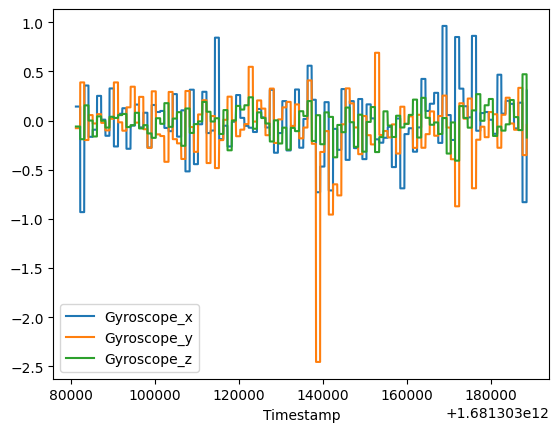

In [37]:
# 陀螺儀
r.plot(x='Timestamp' ,y=['Gyroscope_x','Gyroscope_y','Gyroscope_z'])

<Axes: xlabel='Timestamp'>

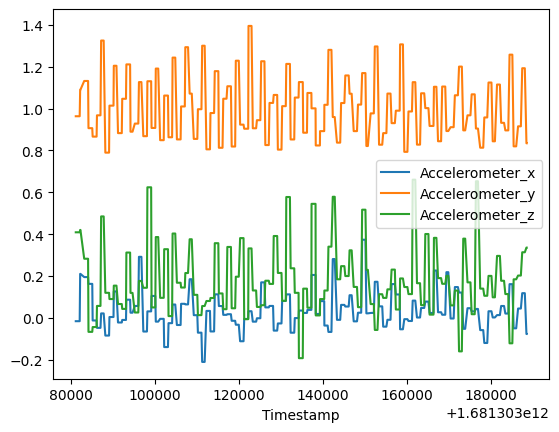

In [38]:
# 加速度感測器
r.plot(x='Timestamp', y=['Accelerometer_x','Accelerometer_y','Accelerometer_z'])

<Axes: xlabel='Timestamp'>

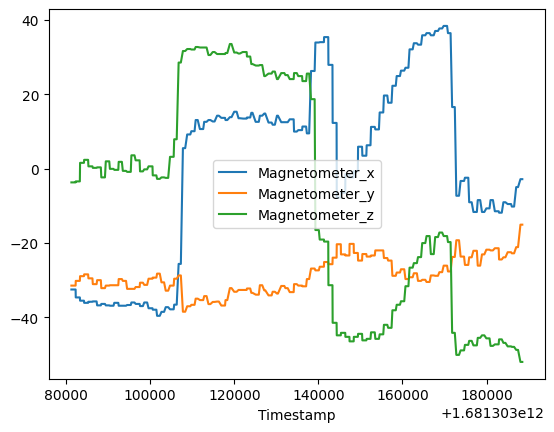

In [39]:
r.plot(x='Timestamp', y=['Magnetometer_x','Magnetometer_y','Magnetometer_z'])

#Task1 步伐偵測

##Task1-1 
>
首先算出g，來畫出波形圖
> 
各組可套用上一次Lab所計算的方法，這邊助教使用簡單的平方相加後開根號的方法求得g

<Axes: xlabel='Timestamp'>

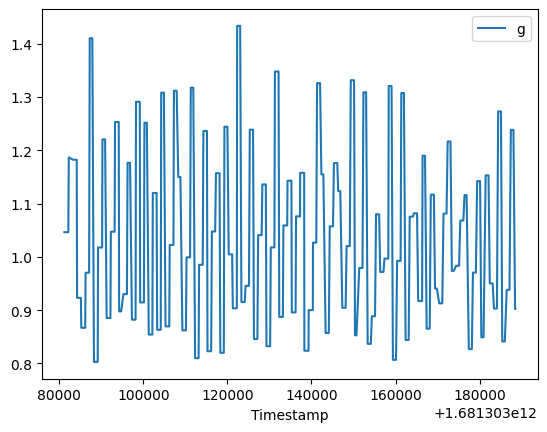

In [40]:
######### Please Write Your Code Here #########
r["g"] = (r["Accelerometer_x"]*r["Accelerometer_x"] + r["Accelerometer_y"]*r["Accelerometer_y"] + r["Accelerometer_z"]*r["Accelerometer_z"] )**0.5 #You can change this
r.plot(x='Timestamp', y=['g'])
# r.to_csv( DATA_DIR+"70.csv", sep=',', index=False, header=True)
########

##Task1-2
>
針對計算出的g作波形分析
> 
各組可以自行修改程式 使用自己的方法來計算
> 

助教提供一個範例方法為從波形中尋找每一個波峰
>
每找到一個波峰就往波峰左邊以及右邊找一個波谷
>
計算這個振福是否有大於設置的閥值(threshold)
>
如果有就把這個波的各項資訊記錄下來 當作是偵測到的一步

len(r[g])=488
savePath:/content/drive/MyDrive/mapLab3/Data/70_addcm.csv
[[0, 1.1866147298890406, 0.8668967221098074, 0, 1681303085213, 70, 0.12843910637585557, 1.015790045261383, 0.23533717630540618, nan, nan, nan, nan, nan], [0.8668967221098074, 1.4105468396603962, 0.8027929383832306, 1681303085213, 1681303088230, 70, -0.018113568998300113, 1.0322828751343947, 0.1626636523466844, -36.08883453504397, -28.9231849358632, 0.8679718329356267, 24.7871858, 120.9978397], [0.8027929383832306, 1.2205289815294453, 0.8976420760434841, 1681303088230, 1681303094219, 70, 0.017119406995459878, 1.021665018180321, 0.13026981967790374, -36.630861381662946, -30.000768558732396, 0.2678093872964382, 24.7871784, 120.9978554], [0.8976420760434841, 1.1766608090254616, 0.9145434508022994, 1681303094219, 1681303099230, 70, 0.06214907144506771, 0.9832815527915955, 0.21687336180669567, -36.42053474610051, -30.639541526635487, 0.9005306900944561, 24.7871927, 120.9979284], [0.8630765862100084, 1.308331241059803, 0.

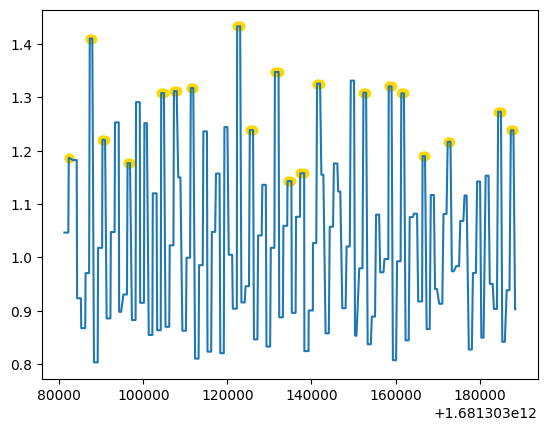

In [52]:
######### Please Write Your Code Here #########
def find_step_use_ta(r, threshold,savePath, step_distance,filename):
  # r.to_csv( '/content/drive/MyDrive/mapLab3/test.csv', sep=',', index=False, header=True)
  # threshold = 0.2
  #frequency = 200
  low_left = 0
  low_right = 0
  time_left = 0
  time_right = 0
  peak = 0
  # step_distance = 30
  index_left = 0
  index_right = 0
  step_info=[]
  print('len(r[g])={}'.format(len(r['g'])))
  r.assign(Verify_left='')
  r.assign(Verify_right='')
  for i in range(1,len(r['g'])):#欄位名稱下第一個row不要往下找
    # print("g:{0},index:{1}".format(r['g'][i],i))
    if i+4 > len(r['g']): # out of bounds
      # print("i:{0},i+4:{0}>len(r['g']):{1}".format(i,i+4,len(r['g'])))
      break
    if (r['g'][i] > r['g'][i-1]) and (r['g'][i] > r['g'][i+4]):  #find peak
      # print("r['g'][i]:{0}>r['g'][i-1]:{1} and r['g'][i]:{2}>r['g'][i+4]:{3},i:{4}".format(r['g'][i],r['g'][i-1],r['g'][i],r['g'][i+4],i))
      peak = r['g'][i]
      # print("peak:{0},index:{1}".format(peak,i))
      for j in range(1,30): #to right side
        if i+j+4 > len(r['g'])-1:
          break
        if r['g'][i+j] < r['g'][i+j+4] and r['g'][i+j] < r['g'][i+j-1]:
          low_right = r['g'][i+j]#右波谷
          time_right = r['Timestamp'][i+j]
          index_right = i+j
          break
      for j in range(1,30): #to left side
        if i-j-1 < 0 :
          break
        if r['g'][i-j] < r['g'][i-j+4] and r['g'][i-j] < r['g'][i-j-1]:
          low_left = r['g'][i-j]#左波谷
          time_left = r['Timestamp'][i-j]
          index_left = i-j
          break
      sum_x,sum_y,sum_z = 0,0,0
      avg_g_x,avg_g_y,avg_g_z = 0,0,0
      avg_m_x,avg_m_y,avg_m_z = 0,0,0

      for i in range(index_left , index_right+1): #計算這一步內的 平均加速度avg_g 的x,y,z各分量
        sum_x += r["Accelerometer_x"][i]
        sum_y += r["Accelerometer_y"][i]
        sum_z += r["Accelerometer_z"][i]
      avg_g_x = sum_x/(index_right-index_left+1)
      avg_g_y = sum_y/(index_right-index_left+1)
      avg_g_z = sum_z/(index_right-index_left+1)
      for i in range(index_left , index_right+1): #計算這一步內的 平均磁力計avg_m 的x,y,z各分量
        sum_x += r["Magnetometer_x"][i]
        sum_y += r["Magnetometer_y"][i]
        sum_z += r["Magnetometer_z"][i]
      avg_m_x = sum_x/(index_right-index_left+1)
      avg_m_y = sum_y/(index_right-index_left+1)
      avg_m_z = sum_z/(index_right-index_left+1)
      lat = r['Latitude'][index_left]
      lng = r['Longitude'][index_left]
      if peak - low_left > threshold and peak - low_right > threshold:  #若振幅大於設定的閥值就把這一步記錄下來 並放進list保存 待會輸出成output
        step_info.append([low_left,peak,low_right,time_left,time_right,step_distance,avg_g_x,avg_g_y,avg_g_z,avg_m_x,avg_m_y,avg_m_z,lat,lng])  
        r.loc[r['g']==low_left,'Verify_left'] = 1
        r.loc[r['g']==low_right,'Verify_right']=1
        r.loc[r['g']==peak,'Verify_peak']=1
  savePath=DATA_DIR+filename
  print("savePath:{0}".format(savePath))
  r.to_csv( savePath, sep=',', index=False, header=True)
  # step_info.to_csv( RESULT_DIR+"step_info.csv", sep=',', index=False, header=True)
  return step_info
step_info=find_step_use_ta(r, 0.2,DATA_DIR, 70,"70_addcm.csv")
print(step_info)
def plot_view(path):
  data=pd.read_csv(path)
  # print(data)
  # left_low=data.loc[data['Verify_left']==1,['Timestamp','Latitude','Longitude','g']]
  # right_low=data.loc[data['Verify_right']==1,['Timestamp','Latitude','Longitude','g']]
  findPeak=data.loc[data['Verify_peak']==1,['Timestamp','Latitude','Longitude','g']]
  findPeak.to_csv( RESULT_DIR+"step_info_peak.csv", sep=',', index=False, header=True)
  # 創建一個圖表和一個軸
  fig, ax = plt.subplots()
  # 畫第一個 DataFrame 的資料
  # r.plot(x='Timestamp', y=['g'])
  ax.plot(data['Timestamp'], data['g'], label='G')
  # ax.plot(findPeak['Timestamp'], findPeak['g'],'go' ,label='peak')
  # 畫第二個 DataFrame 的資料
  print(findPeak)
  ax.scatter(findPeak['Timestamp'], findPeak['g'],color = '#FFD700', label='Peak')
  # ax.scatter(right_low['Timestamp'], right_low['g'],color ='#FF4D00',label='Peak_right')
  # plt.axhline(y=(np.mean(stdPer5sec)*mul),ls='--',c='red')
##########
plot_view(DATA_DIR+"70_addcm.csv")

##Task1-3
上一個步驟把偵測到的步伐都收集起來
>
現在要把這些資料輸出成csv檔案
>
輸出格式不一定要跟助教相同 只要輸出你們需要的資訊即可

In [72]:
######### Please Write Your Code Here #########
def save_step_data(step_info, save_path, filename):
  output = {
      "Step":[],
      "TimeSpend":[],
      "Amp_left":[],
      "Amp_right":[],
      "Peak":[],
      "Timestamp":[],
      "Avg_g_x":[],
      "Avg_g_y":[],
      "Avg_g_z":[],
      "Avg_m_x":[],
      "Avg_m_y":[],
      "Avg_m_z":[],
      "Step_Distance":[],
      "Latitude":[],
      "Longtitude":[]
  }
  df = pd.DataFrame(output)
  step_count = 1
  for i in step_info:
    new_df = pd.DataFrame({
        "Step":[step_count],   #偵測到的第幾步
        "TimeSpend":i[4] - i[3],#一步所花的時間
        "Amp_left":[i[0]],    #左振幅
        "Amp_right":[i[2]],    #右振幅
        "Peak":[i[1]],      #波峰
        "Timestamp":[str(i[3])+"-"+ str(i[4])],  #時間戳記
        "Avg_g_x":i[6],
        "Avg_g_y":i[7],
        "Avg_g_z":i[8],
        "Avg_m_x":i[9],
        "Avg_m_y":i[10],
        "Avg_m_z":i[11],
        "Step_Distance":i[5],    #步距
        "Latitude":i[12],
        "Longtitude":i[13]
    })
    df = pd.concat([df,new_df],ignore_index=True)
    step_count=step_count+1
  save_file_path = save_path  + filename
  print(save_file_path)
  df.to_csv(save_file_path,index=False)  ##輸出結果檔名要記得
save_step_data(step_info,RESULT_DIR+"/70/","step_info_70_cm.csv")
##########

/content/drive/MyDrive/mapLab3/Result//70/step_info_70_cm.csv


##Task2 步距猜測

##Task2-1
步距的猜測各組可以使用自己上網查詢的方法
>
這裡助教提供一個使用LinearRegression的方法
>
先讀取每組不同步距的步伐偵測資料檔
>
讀取想要當作參數的部分
>
設定X為自變數(各項資料如左振幅、右振幅、波峰、時間等等) Y為依變數(要猜測的步距)


In [59]:
######### Please Write Your Code Here #########
from glob import glob

files = glob(RESULT_DIR+"70/"+"*_cm.csv")
# files = [] #glob("/content/drive/MyDrive/Map/Lab3/Result/*_cm.csv")
# for d in os.listdir(dir):
#         files.append(dir + d + "/" + file_name)

df_list = [pd.read_csv(file) for file in files]
# print("df_list:{0}".format(df_list))
df = pd.concat(
    (pd.read_csv(file,usecols=['TimeSpend','Amp_left','Amp_right',"Peak","Step_Distance"],dtype={'TimeSpend':float,'Amp_left':float,'Amp_right':float,'Peak':float,'Step_Distance':float})for file in files),ignore_index=True)

X = df.iloc[:,:-1].values#取到最後一個欄位的整筆row
Y = df.iloc[:,-1].values#取最後一個欄位全部的資料

print(X)
print(Y)
########

[[ 1.68e+12  0.00e+00  8.67e-01  1.19e+00]
 [ 3.02e+03  8.67e-01  8.03e-01  1.41e+00]
 [ 5.99e+03  8.03e-01  8.98e-01  1.22e+00]
 [ 5.01e+03  8.98e-01  9.15e-01  1.18e+00]
 [-4.04e+03  8.63e-01  9.15e-01  1.31e+00]
 [-4.04e+03  8.63e-01  9.15e-01  1.31e+00]
 [ 1.20e+04  8.63e-01  8.23e-01  1.32e+00]
 [-3.05e+03  8.20e-01  8.23e-01  1.43e+00]
 [ 1.10e+04  8.20e-01  8.32e-01  1.24e+00]
 [ 0.00e+00  8.32e-01  8.32e-01  1.35e+00]
 [ 0.00e+00  8.32e-01  8.32e-01  1.14e+00]
 [ 0.00e+00  8.32e-01  8.32e-01  1.16e+00]
 [ 0.00e+00  8.32e-01  8.32e-01  1.33e+00]
 [-2.11e+04  8.53e-01  8.32e-01  1.31e+00]
 [-2.11e+04  8.53e-01  8.32e-01  1.32e+00]
 [-2.11e+04  8.53e-01  8.32e-01  1.31e+00]
 [-2.11e+04  8.53e-01  8.32e-01  1.19e+00]
 [ 2.31e+04  8.53e-01  9.74e-01  1.22e+00]
 [ 4.98e+03  8.49e-01  8.41e-01  1.27e+00]
 [ 0.00e+00  8.41e-01  8.41e-01  1.24e+00]]
[70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70.
 70. 70.]


##Task2-2
這邊使用的是sklearn linear model
>
各組可使用自己的方式提升準確度

In [60]:
######### Please Write Your Code Here #########
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=777) #設定訓練大小為0.8 測試大小為0.2

reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_pred = reg.predict(X_test)

np.set_printoptions(precision=2) #設定預測精準度到小數點後第2位
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1)) #左邊為預測結果 右邊為真實結果

############

[[70. 70.]
 [70. 70.]
 [70. 70.]
 [70. 70.]]


##Task3 計算前進方向

##Task3-1
這個部分希望同學計算出當前步伐的前進方向
>
判斷方法不可以使用經緯度
>
這邊助教提供的方法為收集偵測到的步伐時間內的平均加速度在水平方向上的分量
>
以及磁力計在水平方向上的分量
>
因為磁力計在水平方向指向南方 所以求出這兩個像量的夾角就可以得到前進方向

In [61]:
######### Please Write Your Code Here #########
print(RESULT_DIR+"70/step_info_70_cm.csv")
new_df = pd.read_csv(RESULT_DIR+"70/step_info_70_cm.csv") #讀取步伐資料檔
dir_list = []

for i in range(len(new_df["Step"])):
  avg_g = np.array([new_df["Avg_g_x"][i], new_df["Avg_g_y"][i] ,new_df["Avg_g_z"][i]])
  avg_m = np.array([new_df["Avg_m_x"][i], new_df["Avg_m_y"][i] ,new_df["Avg_m_z"][i]])
  z = np.array([0,0,-1]) #z軸單位向量 與avg_g同向
  u = z - (np.dot(z,avg_g)/np.dot(avg_g,avg_g)*z) #重力加速度在水平方向分量 使用
  v = avg_m - ((np.dot(avg_g,avg_m)/np.dot(avg_g,avg_g))*avg_m) #磁力計在水平方向朝南 使用avg_m - (avg_m在avg_g的投影向量)
  cos = np.dot(u,v) / ((np.dot(u,u)**0.5) * np.dot(v,v)**0.5) #計算兩個COS值 使用高中所學公式
  cross_ans = np.dot(np.cross(v,u) , avg_g) #判斷夾角偏向東還是西 使用u與v外積後和avg_g內積 判斷正負值來得知往左還往右
  if cross_ans < 0: #與avg_m 反向 右手定則由南邊往左偏移
    if cos >=0.7071 and cos <=1:
      dir = "南"
    elif cos <0.7071 and cos >0:
      dir = "東"
    elif cos <0 and cos >=-0.7071:
      dir = "東"
    elif cos < -0.7071 and cos >-1:
      dir = "北"
  elif cross_ans > 0: #與avg_m 反向 右手定則由南邊往左偏移
    if cos >=0.7071 and cos <=1:
      dir = "南"
    elif cos <0.7071 and cos >0:
      dir = "西"
    elif cos <0 and cos >=-0.7071:
      dir = "西"
    elif cos < -0.7071 and cos >-1:
      dir = "北"
  dir_list.append(dir)
print(dir_list)
  #1 ~ 0.7071 0度~45度
  #0.7071 ~ 0 45度~90度
  #0 ~ -0.7071 90度 ~ 135度
  #-0.7071 ~ -1 135度~180度
###########

/content/drive/MyDrive/mapLab3/Result/70/step_info_70_cm.csv
['南', '東', '東', '東', '東', '東', '東', '東', '西', '西', '西', '西', '西', '西', '西', '西', '西', '西', '南', '南']


<ipython-input-61-5be739495f5d>:10: RuntimeWarning: invalid value encountered in double_scalars
  u = z - (np.dot(z,avg_g)/np.dot(avg_g,avg_g)*z) #重力加速度在水平方向分量 使用
<ipython-input-61-5be739495f5d>:11: RuntimeWarning: invalid value encountered in double_scalars
  v = avg_m - ((np.dot(avg_g,avg_m)/np.dot(avg_g,avg_g))*avg_m) #磁力計在水平方向朝南 使用avg_m - (avg_m在avg_g的投影向量)


##Task4 將偵測到的步伐畫在地圖上

In [ ]:
#下載地圖
%cd /content/drive/MyDrive/mapLab3/
!gdown --id 1_rUFNWCCFTu4YzFUEG2YVL1dARRiLCLK

/content/drive/MyDrive/mapLab3
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_rUFNWCCFTu4YzFUEG2YVL1dARRiLCLK
To: /content/drive/MyDrive/mapLab3/map.jpg
100% 74.3k/74.3k [00:00<00:00, 33.9MB/s]


In [90]:
class GPSVis(object):
    """
        Class for GPS data visualization using pre-downloaded OSM map in image format.
    """
    def __init__(self, data_path, map_path, points):
        """
        :param data_path: Path to file containing GPS records.
        :param map_path: Path to pre-downloaded OSM map in image format.
        :param points: Upper-left, and lower-right GPS points of the map (lat1, lon1, lat2, lon2).
        """
        self.data_path = data_path
        self.points = points
        self.map_path = map_path

        self.result_image = Image
        self.x_ticks = []
        self.y_ticks = []

    def plot_map(self, output='save', save_as='resultMap.png'):
        """
        Method for plotting the map. You can choose to save it in file or to plot it.
        :param output: Type 'plot' to show the map or 'save' to save it.
        :param save_as: Name and type of the resulting image.
        :return:
        """
        self.get_ticks()
        fig, axis1 = plt.subplots(figsize=(10, 10))
        axis1.imshow(self.result_image)
        axis1.set_xlabel('Longitude')
        axis1.set_ylabel('Latitude')
        axis1.set_xticklabels(self.x_ticks)
        axis1.set_yticklabels(self.y_ticks)
        axis1.grid()
        if output == 'save':
            plt.savefig(save_as)
        else:
            plt.show()

    def create_image(self, color, width=2):
        """
        Create the image that contains the original map and the GPS records.
        :param color: Color of the GPS records.
        :param width: Width of the drawn GPS records.
        :return:
        """
        data = pd.read_csv(self.data_path, names=['LATITUDE', 'LONGITUDE'], sep=',')

        self.result_image = Image.open(self.map_path, 'r')
        img_points = []
        gps_data = tuple(zip(data['LATITUDE'].values, data['LONGITUDE'].values))
        draw = ImageDraw.Draw(self.result_image)
        for d in gps_data:
            x1, y1 = self.scale_to_img(d, (self.result_image.size[0], self.result_image.size[1]))
            draw.ellipse([(x1-2, y1-2),(x1+2, y1+2)], fill=color,width=width)
            #print(img_points)
        

    def scale_to_img(self, lat_lon, h_w):
        """
        Conversion from latitude and longitude to the image pixels.
        It is used for drawing the GPS records on the map image.
        :param lat_lon: GPS record to draw (lat1, lon1).
        :param h_w: Size of the map image (w, h).
        :return: Tuple containing x and y coordinates to draw on map image.
        """
        # https://gamedev.stackexchange.com/questions/33441/how-to-convert-a-number-from-one-min-max-set-to-another-min-max-set/33445
        old = (self.points[2], self.points[0])
        new = (0, h_w[1])
        y = ((lat_lon[0] - old[0]) * (new[1] - new[0]) / (old[1] - old[0])) + new[0]
        old = (self.points[1], self.points[3])
        new = (0, h_w[0])
        x = ((lat_lon[1] - old[0]) * (new[1] - new[0]) / (old[1] - old[0])) + new[0]
        # y must be reversed because the orientation of the image in the matplotlib.
        # image - (0, 0) in upper left corner; coordinate system - (0, 0) in lower left corner
        return x, h_w[1] - y

    def get_ticks(self):
        """
        Generates custom ticks based on the GPS coordinates of the map for the matplotlib output.
        :return:
        """
        self.x_ticks = np.round(
            np.linspace(self.points[1], self.points[3], num=7),
            4
        )
        y_ticks = np.round(
            np.linspace(self.points[2], self.points[0], num=8),
            4
        )
        # self.x_ticks = map(
        #     lambda x: round(x, 4),
        #     np.linspace(self.points[1], self.points[3], num=7))
        # y_ticks = map(
        #     lambda x: round(x, 4),
        #     np.linspace(self.points[2], self.points[0], num=8))
        # Ticks must be reversed because the orientation of the image in the matplotlib.
        # image - (0, 0) in upper left corner; coordinate system - (0, 0) in lower left corner
        self.y_ticks = sorted(y_ticks, reverse=True)


/content/drive/MyDrive/mapLab3/Result/70/result.txt


<ipython-input-90-f608acbccb6c>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis1.set_xticklabels(self.x_ticks)
<ipython-input-90-f608acbccb6c>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis1.set_yticklabels(self.y_ticks)


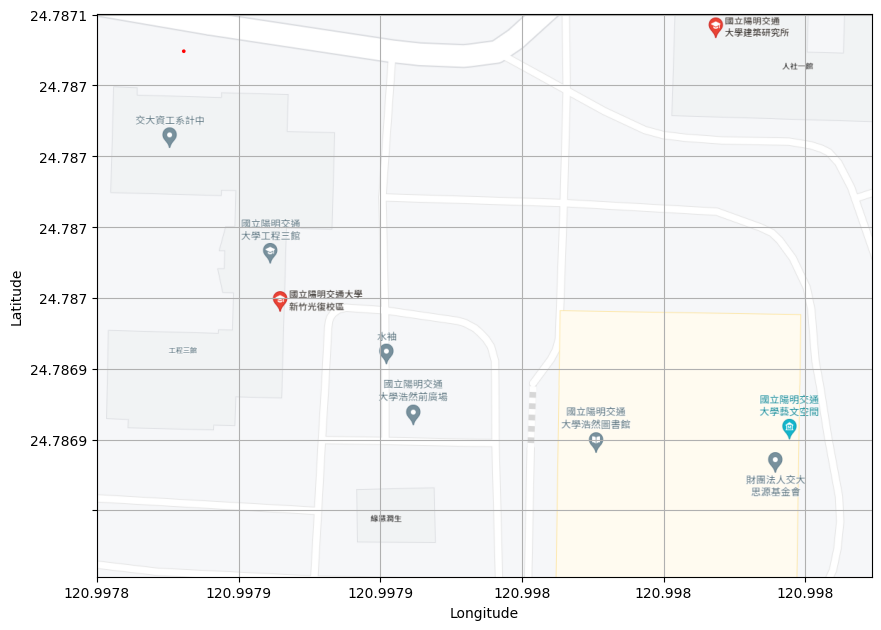

In [91]:
def Draw(filesPath,Z_filesPath):
  print(filesPath)
  vis = GPSVis(data_path=filesPath,
               map_path='/content/drive/MyDrive/mapLab3/Data/map.png',  # Path to map downloaded from the OSM.
               points=(24.787081120101012, 120.997781052411112, 24.7869010205423101, 120.998049052412314)) # Two coordinates of the map (upper left, lower right)

  vis.create_image(color=(255, 0, 0), width=10)  # Set the color and the width of the GNSS tracks.
  vis.plot_map(output='save')
mapData=pd.read_csv(RESULT_DIR+"70/step_info_70_cm.csv")
mapData=mapData.iloc[:, [13,14]].dropna()
# print(mapData)
mapData.to_csv( RESULT_DIR+"70/result.txt", sep=',', index=False, header=None)
Draw(RESULT_DIR+"70/result.txt",DATA_DIR)